In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [69]:
from matplotlib import pyplot as plt
import seaborn as sns
import math
import plotly.express as px

In [70]:
file = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
file.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [71]:
for i in file.columns:
    print( i+" \t: " +str(file[i].isnull().sum()))

Id 	: 0
MSSubClass 	: 0
MSZoning 	: 0
LotFrontage 	: 259
LotArea 	: 0
Street 	: 0
Alley 	: 1369
LotShape 	: 0
LandContour 	: 0
Utilities 	: 0
LotConfig 	: 0
LandSlope 	: 0
Neighborhood 	: 0
Condition1 	: 0
Condition2 	: 0
BldgType 	: 0
HouseStyle 	: 0
OverallQual 	: 0
OverallCond 	: 0
YearBuilt 	: 0
YearRemodAdd 	: 0
RoofStyle 	: 0
RoofMatl 	: 0
Exterior1st 	: 0
Exterior2nd 	: 0
MasVnrType 	: 8
MasVnrArea 	: 8
ExterQual 	: 0
ExterCond 	: 0
Foundation 	: 0
BsmtQual 	: 37
BsmtCond 	: 37
BsmtExposure 	: 38
BsmtFinType1 	: 37
BsmtFinSF1 	: 0
BsmtFinType2 	: 38
BsmtFinSF2 	: 0
BsmtUnfSF 	: 0
TotalBsmtSF 	: 0
Heating 	: 0
HeatingQC 	: 0
CentralAir 	: 0
Electrical 	: 1
1stFlrSF 	: 0
2ndFlrSF 	: 0
LowQualFinSF 	: 0
GrLivArea 	: 0
BsmtFullBath 	: 0
BsmtHalfBath 	: 0
FullBath 	: 0
HalfBath 	: 0
BedroomAbvGr 	: 0
KitchenAbvGr 	: 0
KitchenQual 	: 0
TotRmsAbvGrd 	: 0
Functional 	: 0
Fireplaces 	: 0
FireplaceQu 	: 690
GarageType 	: 81
GarageYrBlt 	: 81
GarageFinish 	: 81
GarageCars 	: 0
GarageArea 	

In [72]:
null_replacements = {'MSZoning':file['MSZoning'].value_counts().idxmax(),'LotFrontage':file['LotFrontage'].median(),'Alley' : 'NA',
                     'Utilities' : file['Utilites'].value_counts().idxmax(),'Exterior1st':file['Exterior1st'].value_counts().idxmax(),
                     'Exterior2nd':file['Exterior2nd'].value_counts().idxmax(),'BsmtQual':'NA','BsmtCond':'NA', 'BsmtExposure':'NA', 
                     'BsmtFinType1':'NA','BsmtFinSF1':file['BsmtFinSF1'].median(),'BsmtFinType2':'NA','BsmtFinSF2': file['BsmtFinSF2'].median()
                     'BsmtUnfSF': file['BsmtUnfSF'].median(),'TotalBsmtSF': file['TotalBsmtSF'].median(),
                     'BsmtFullBath': file['BsmtFullBath'].median(),'BsmtHalfBath': file['BsmtHalfBath'].median(),
                     'Functional':file['Functional'].value_counts().idxmax(),'FireplaceQu':'NA','GarageType':'NA',
                     'GarageYrBlt':file['GarageYrBlt'].mean(),'GarageFinish':'NA','GarageCars': file['GarageCars'].median(),
                     'GarageArea': file['GarageArea'].median(),'GarageQual':'NA','GarageCond':'NA','PoolQC':'NA','Fence':'NA',
                     'MiscFeature':'NA','MasVnrType':file['MasVnrType'].value_counts().idxmax(),'MasVnrArea':file['MasVnrArea'].median(),
                     'Electrical': file['Electrical'].value_counts().idxmax(),'SaleType': file['SaleType'].value_counts().idxmax()}
for i in null_replacements:
    file[i] = file[i].fillna(dic[i])

In [73]:
print('Total no. of null values now are : '+ str(file[i].isnull().sum().sum()))

Total no. of null values now are : 0


In [74]:
file

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [75]:
a= []
for i in file.index:
    a.append(' ID : '+ str(file['Id'][i]))
file['ID_vis'] = a
fig = px.box(data_frame = file.reset_index(),hover_name = 'ID_vis',y = 'SalePrice',hover_data = ['MoSold', 'YrSold'],height = 500,width = 400,
             labels = {'SalePrice':'Sale Price in "$"'},title = 'Box plot of the sale price:')
fig.show()

In [76]:
removed = 0
for i in file.index:
    if file['SalePrice'][i]>450000:
        file = file.drop(i)
        removed+=1
print(removed)

14


In [77]:
fig = px.box(data_frame = file.reset_index(),hover_name = 'ID_vis',y = 'SalePrice',hover_data = ['MoSold', 'YrSold'],height = 500,width = 400,\
             labels = {'SalePrice' : 'Sale Price in "$"'},title = 'Box plot of the sale price:')
fig.show()

In [78]:
file.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [79]:
list_cat = ['MSSubClass','MSZoning','Street','Alley', 'LotShape', 'LandContour','Utilities', 'LotConfig','LandSlope', 'Neighborhood','Condition1', 
            'Condition2','BldgType','HouseStyle', 'OverallQual','OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType',
            'ExterQual','ExterCond', 'Foundation', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 
            'CentralAir', 'Electrical','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr','KitchenQual',
            'TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars', 'GarageQual','GarageCond', 
            'PavedDrive','PoolQC','Fence', 'MiscFeature','SaleType','SaleCondition']
list_cont = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 
             'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold',]
print('No. of columns with categorical data values are : '+str(len(list_cat)))
print('No. of columns with continuous data values are : '+str(len(list_cont)))

No. of columns with categorical data values are : 55
No. of columns with continuous data values are : 24


In [80]:
dic1 = {}
for i in list_cat :
    a = []
    for j in file.groupby(i).mean().index:
        a.append(j)
    dic1[i] = a
dic1['Alley'] = ['Grvl','Pave','NA']
dic1['LandContour'] = ['Lvl','Bnk', 'HLS', 'Low']
dic1['LotConfig'] = ['Inside','Corner', 'CulDSac', 'FR2', 'FR3']
dic1['ExterQual'] = ['Ex', 'Gd', 'TA', 'Fa']
dic1['ExterCond'] = ['Ex','Gd', 'TA','Fa','Po']
dic1['BsmtQual'] = ['Ex', 'Gd', 'TA', 'Fa','NA']
dic1['BsmtCond'] = ['Gd', 'TA', 'Fa','Po','NA']
dic1['BsmtExposure'] = ['Gd','Av', 'Mn', 'No','NA']
dic1['BsmtFinType1'] = ['GLQ','ALQ', 'BLQ','Rec', 'LwQ', 'Unf','NA']
dic1['BsmtFinType2'] = ['GLQ','ALQ', 'BLQ','Rec', 'LwQ', 'Unf','NA']
dic1['HeatingQC'] = ['Ex','Gd', 'TA','Fa','Po']
dic1['Electrical'] = ['SBrkr','FuseA', 'FuseF', 'FuseP', 'Mix']
dic1['KitchenQual'] = ['Ex','Gd', 'TA','Fa']
dic1['Functional']=['Typ','Min1', 'Min2', 'Mod','Maj1', 'Maj2', 'Sev']
dic1['FireplaceQu'] = ['Ex','Gd', 'TA','Fa','Po','NA']
dic1['GarageQual'] =['Ex','Gd', 'TA','Fa','Po','NA']
dic1['GarageCond'] =['Ex','Gd', 'TA','Fa','Po','NA']
dic1['GarageFinish'] = ['Fin','RFn','Unf','NA']
dic1['PoolQC'] = ['Ex','Gd','Fa','NA']
dic1['Fence'] = ['GdPrv','MnPrv','GdWo', 'MnWw','NA']
dic1['SaleType'] = ['WD','CWD','New','COD', 'Con','ConLw', 'ConLI','ConLD','Oth', ]
dic1['SaleCondition'] = ['Normal','Abnorml', 'AdjLand', 'Alloca', 'Family','Partial']

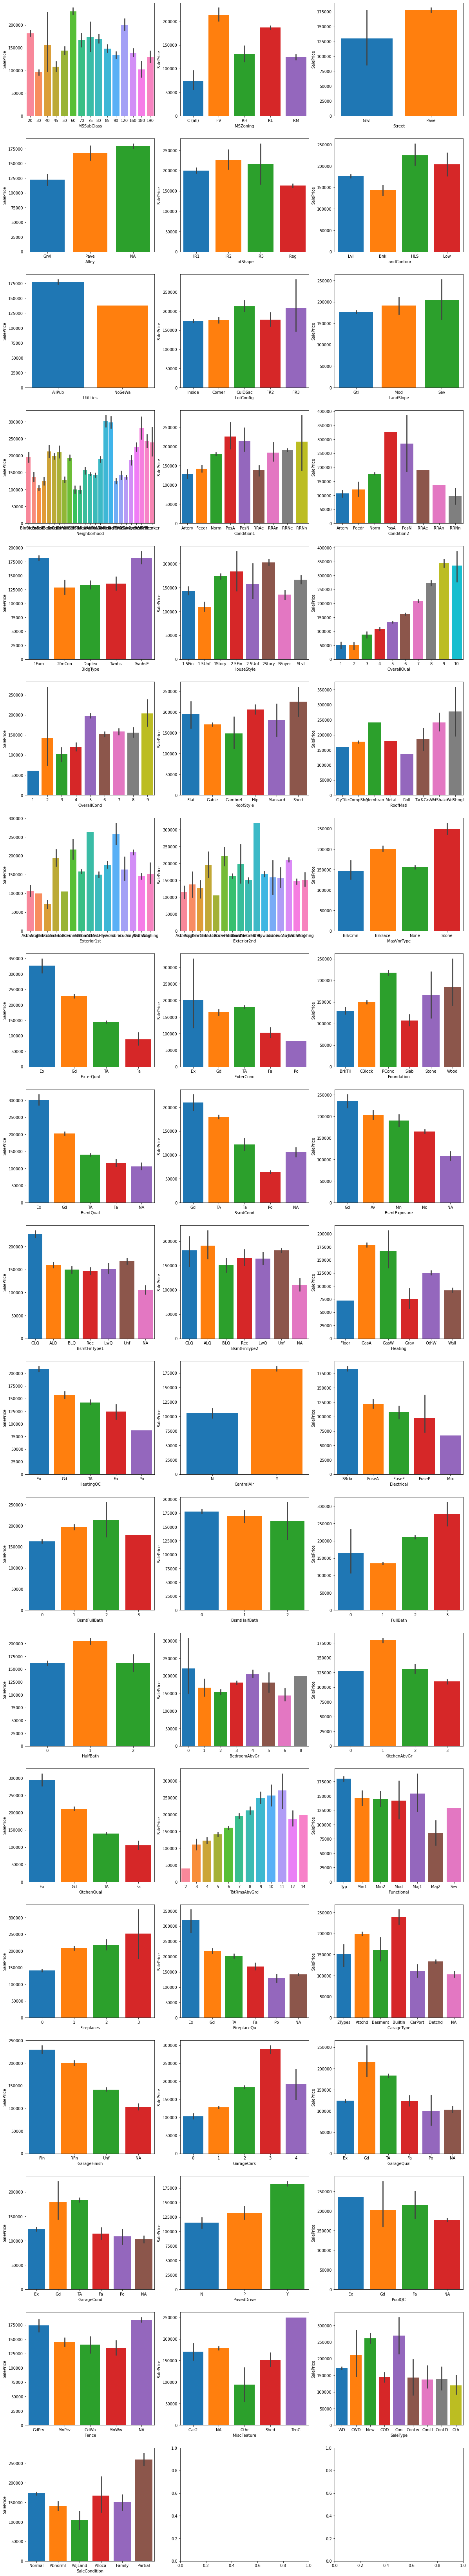

In [81]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(19,n,figsize = (s,6*s))
counter = 0
for i in list_cat:
    sns.barplot(x = i , y = y , data  = file,order= dic1[i], ax = axes[counter//n][counter%n],saturation = 1)
    counter+=1

In [82]:
df = file.groupby('Alley').mean()
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Alley,,,,,,,,,,,,,,,,,,,,,
Grvl,735.900000,63.900000,62.180000,8932.500000,5.180000,6.260000,1919.740000,1972.520000,17.500000,144.160000,...,50.520000,52.620000,75.060000,0.000000,9.600000,0.0000,58.000000,6.260000,2007.660000,122219.080000
NA,729.574170,55.354244,70.537269,10617.333579,6.088561,5.556458,1973.005166,1984.858303,101.013284,453.483395,...,96.938745,44.785978,19.332103,3.673801,14.840590,2.5631,44.718819,6.345387,2007.821402,179580.450185
Pave,726.390244,102.804878,47.756098,5953.121951,6.414634,5.439024,1968.317073,1993.780488,129.926829,233.585366,...,23.902439,75.853659,51.341463,0.000000,10.195122,0.0000,0.000000,5.975610,2007.804878,168000.585366


In [83]:
z = 1.960 #confidence level of 95% (for 99% use 3.291)
s = 'Alley'
con = []
sale_vis = []
count = []
for i in df.index:
    a = []
    counter = 0
    for j in file.index:
        if file[s][j] == i:
            a.append(file['SalePrice'][j]-df['SalePrice'][i])
            counter+=1
    count.append(counter)
    std = np.std(a)
    confidence = std/(math.sqrt(counter))
    con.append((z*confidence)//1)
    sale_vis.append('Sale Price : ' + str(df['SalePrice'][i]//1))
df ['Confidence'] = con 
df ['sale_vis'] = sale_vis
df ['Total Count'] = count
count_per = []
for i in df.index:
    per = df['Total Count'][i]/np.sum(count)
    per = (per*10000)//1
    per= per//100
    count_per.append(str(per)+'%')
df['Count Percent'] = count_per
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Confidence,sale_vis,Total Count,Count Percent
Alley,,,,,,,,,,,,,,,,,,,,,
Grvl,735.900000,63.900000,62.180000,8932.500000,5.180000,6.260000,1919.740000,1972.520000,17.500000,144.160000,...,9.600000,0.0000,58.000000,6.260000,2007.660000,122219.080000,9543.0,Sale Price : 122219.0,50,3.0%
NA,729.574170,55.354244,70.537269,10617.333579,6.088561,5.556458,1973.005166,1984.858303,101.013284,453.483395,...,14.840590,2.5631,44.718819,6.345387,2007.821402,179580.450185,3769.0,Sale Price : 179580.0,1355,93.0%
Pave,726.390244,102.804878,47.756098,5953.121951,6.414634,5.439024,1968.317073,1993.780488,129.926829,233.585366,...,10.195122,0.0000,0.000000,5.975610,2007.804878,168000.585366,11601.0,Sale Price : 168000.0,41,2.0%


In [84]:
dic1['Alley'] = ['Grvl','Pave','NA']
i = 'Alley'

fig = px.bar(data_frame = df.reset_index(),y='SalePrice', color = i ,x = i,category_orders = dic1,error_y = 'Confidence',
             hover_name = sale_vis,hover_data = ['Total Count','Count Percent'],opacity= 1,labels = {y : 'Sale Price in "$"', 'Grvl':'Gravel','Pave':'Paved','NA':'Not Paved'})
fig.show()

In [85]:
#List of features on which to apply one hot encoding before applying regression:
list_pure_categorical = ['MSSubClass','MSZoning','LotShape','LandContour', 'LotConfig', 'Neighborhood','Condition1', 'Condition2', 'BldgType',
                        'HouseStyle','RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','GarageType','SaleType',
                         'SaleCondition','MiscFeature','MasVnrType']

#List of categorical features that we can directly apply regression on:
categorical_ordered = ['Street','Alley','Utilities','LandSlope','OverallQual', 'OverallCond','ExterQual', 'ExterCond','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC', 'CentralAir','Electrical','KitchenQual','BsmtFullBath', 
                       'BsmtHalfBath', 'FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces',
                       'FireplaceQu','GarageFinish', 'GarageCars','GarageQual','GarageCond', 'PavedDrive','PoolQC','Fence']

#List of continuous variables:
list_continuous = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF',
                   'GarageYrBlt', 'GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal',
                   'MoSold', 'YrSold','LowQualFinSF', 'GrLivArea','2ndFlrSF']

In [86]:
file.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ID_vis
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,2,2008,WD,Normal,208500,ID : 1
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,5,2007,WD,Normal,181500,ID : 2
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,9,2008,WD,Normal,223500,ID : 3
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000,ID : 4
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,12,2008,WD,Normal,250000,ID : 5


In [87]:
for i in categorical_ordered:
    a = []
    for j in file.index:
        for k in range(len(dic1[i])):
            if file[i][j] == dic1[i][k]:
                a.append(k+1)
    file[i] = a

In [88]:
file.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ID_vis
0,1,60,RL,65.0,8450,2,3,Reg,Lvl,1,...,4,5,NA,0,2,2008,WD,Normal,208500,ID : 1
1,2,20,RL,80.0,9600,2,3,Reg,Lvl,1,...,4,5,NA,0,5,2007,WD,Normal,181500,ID : 2
2,3,60,RL,68.0,11250,2,3,IR1,Lvl,1,...,4,5,NA,0,9,2008,WD,Normal,223500,ID : 3
3,4,70,RL,60.0,9550,2,3,IR1,Lvl,1,...,4,5,NA,0,2,2006,WD,Abnorml,140000,ID : 4
4,5,60,RL,84.0,14260,2,3,IR1,Lvl,1,...,4,5,NA,0,12,2008,WD,Normal,250000,ID : 5


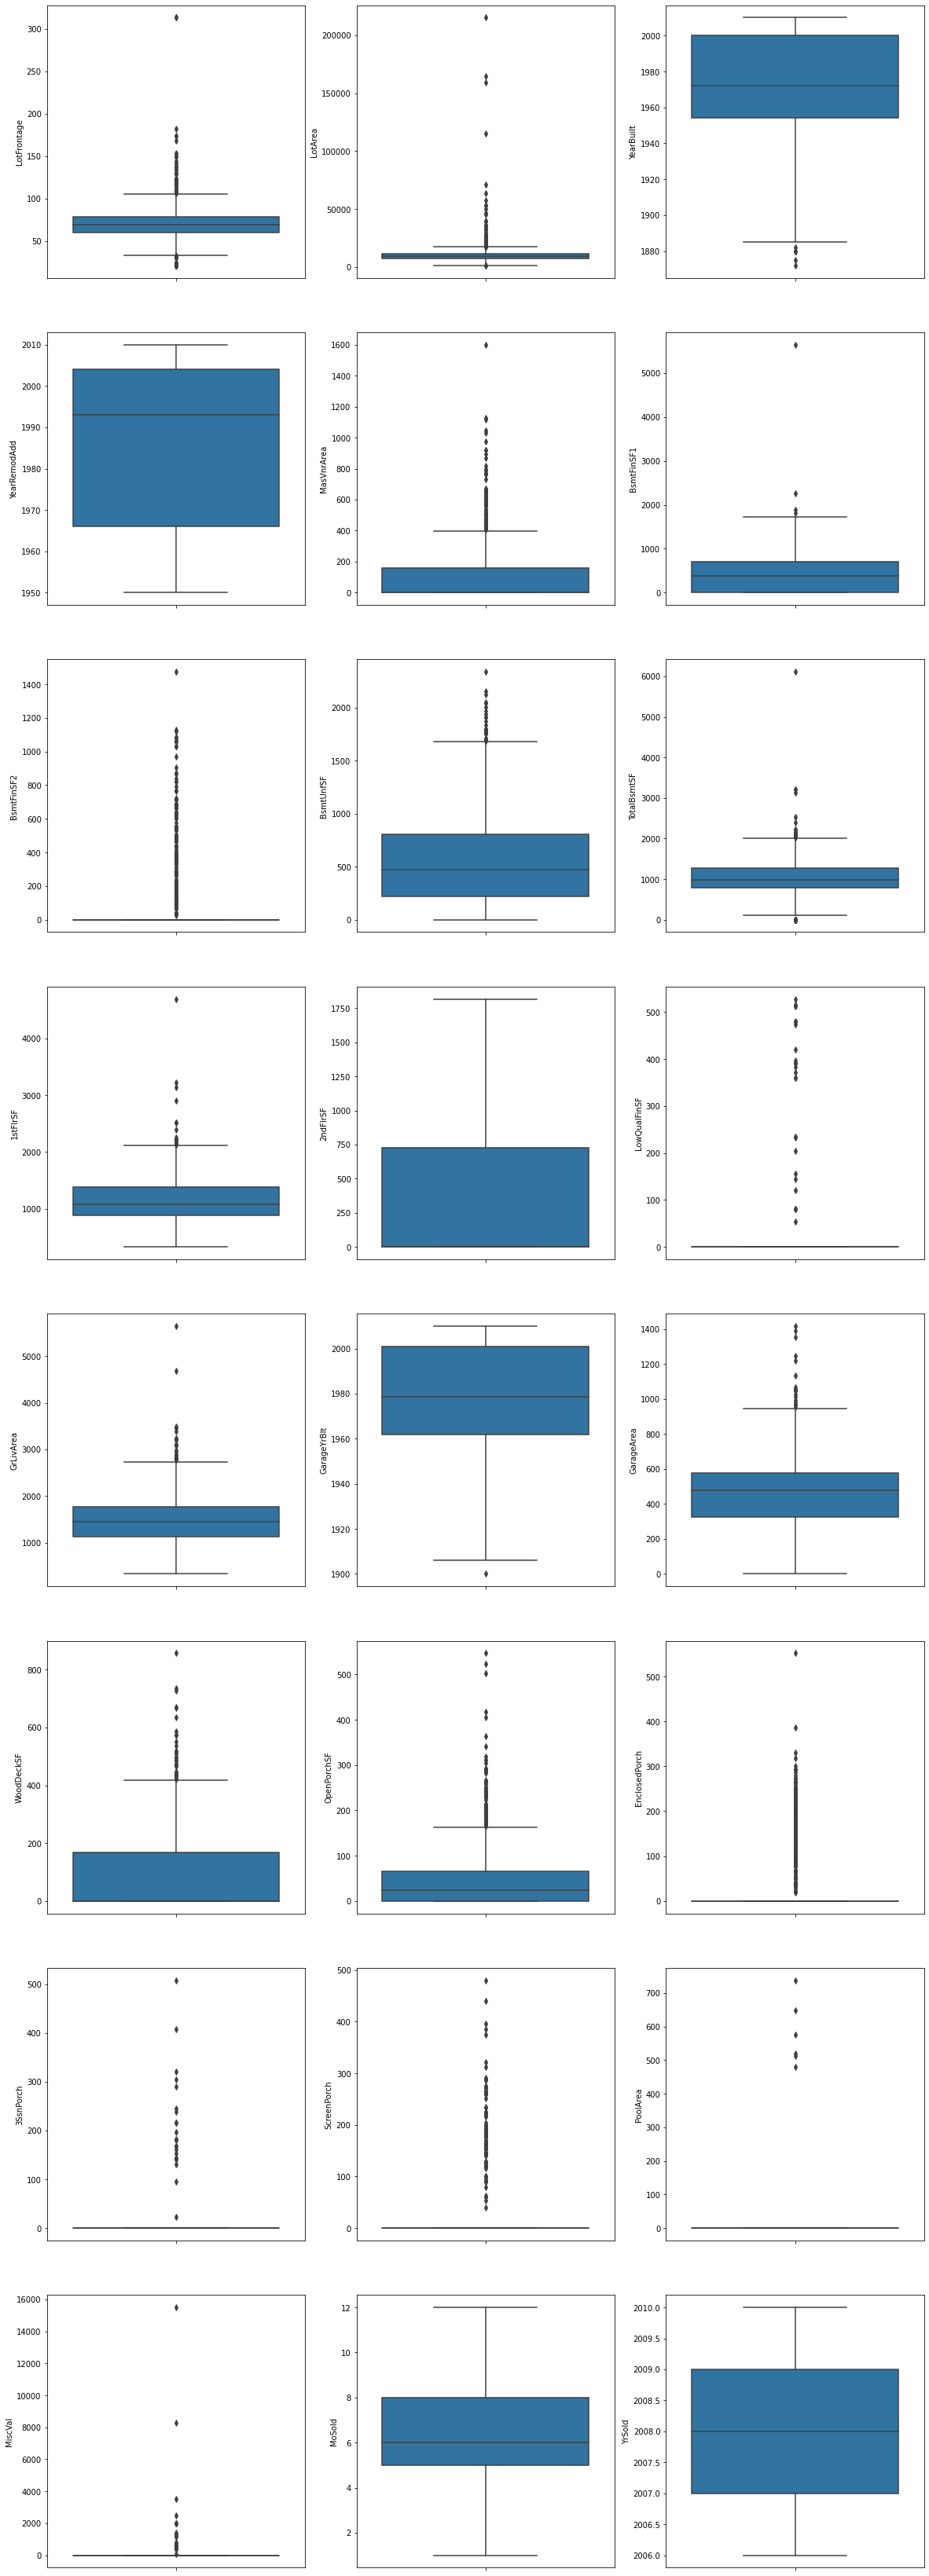

In [89]:
n = 3
s= 20
f,axes = plt.subplots(3*n-1,n,figsize = (s,3*s))
counter = 0
for i in list_cont:
    sns.boxplot( y = i,data  = file, ax = axes[counter//n][counter%n])
    counter+=1

In [90]:
outlier ={'LotFrontage':150, 'LotArea':100000,'MasVnrArea':900,'BsmtFinSF1':2000,'TotalBsmtSF':2500,
               '1stFlrSF':2500, 'GarageArea':1130,'WoodDeckSF':600, 'OpenPorchSF':310,
               'EnclosedPorch':310,'3SsnPorch':350,'MiscVal':6000,'GrLivArea':3500, 'BsmtFullBath':2.5,'2ndFlrSF':1750}
for j in outlier:
    for i in file.index:
        if file[j][i]>outlier[j]:
            file = file.drop(i)
            removed+=1
    print(j + ' : '+ str(removed))
for i in file.index:
    if file['YearBuilt'][i]<1880:
        file = file.drop(i)
        removed+=1
print('YearBuilt' + ' : '+ str(removed))

LotFrontage : 22
LotArea : 26
MasVnrArea : 34
BsmtFinSF1 : 35
TotalBsmtSF : 38
1stFlrSF : 40
GarageArea : 45
WoodDeckSF : 50
OpenPorchSF : 59
EnclosedPorch : 62
3SsnPorch : 64
MiscVal : 66
GrLivArea : 66
BsmtFullBath : 77
2ndFlrSF : 78
YearBuilt : 80


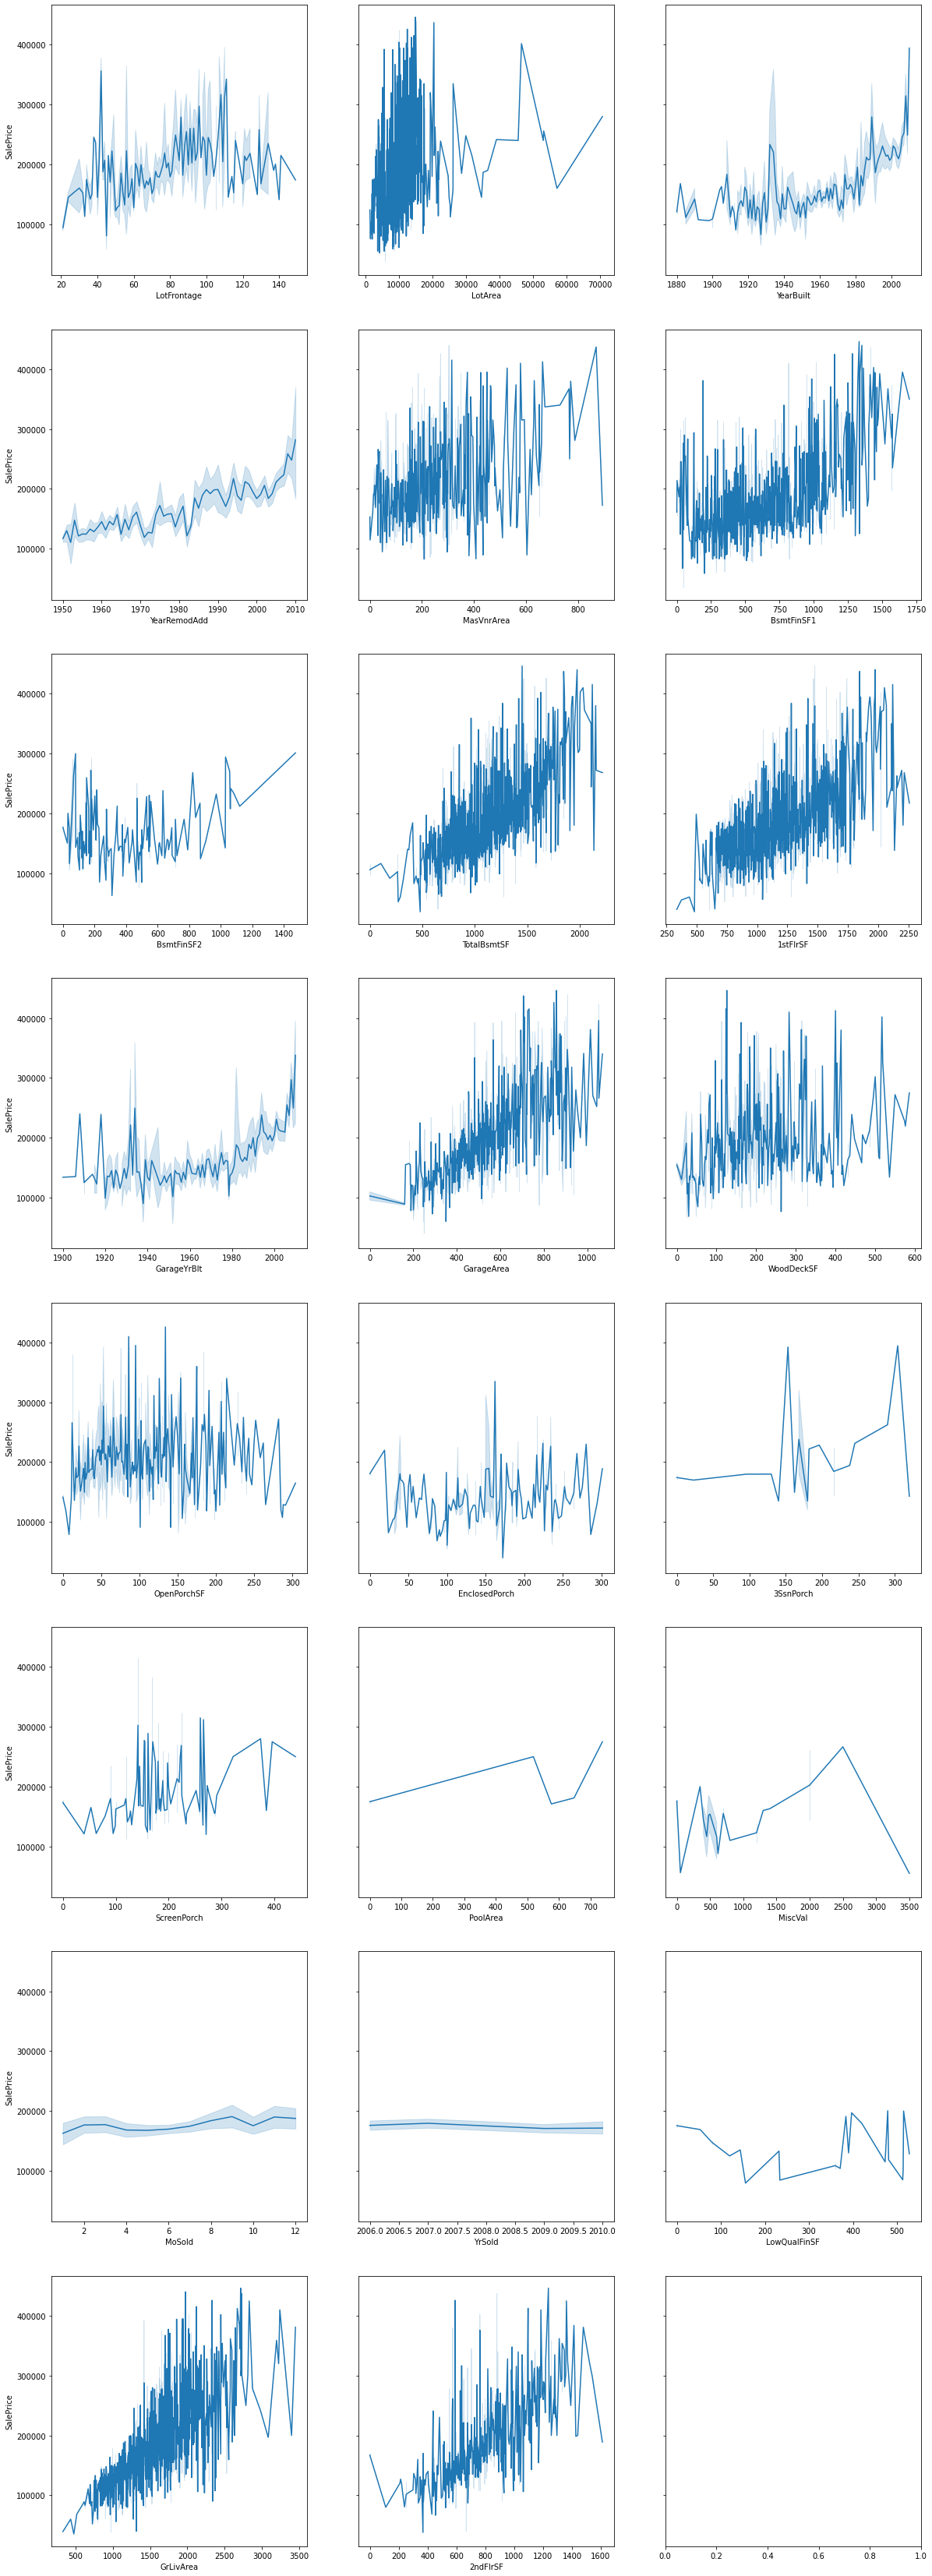

In [91]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(8,n,figsize = (s,3*s),sharey=True)
counter = 0
for i in list_continuous:
    sns.lineplot(x = i , y = y , data  = file, ax = axes[counter//n][counter%n])
    counter+=1

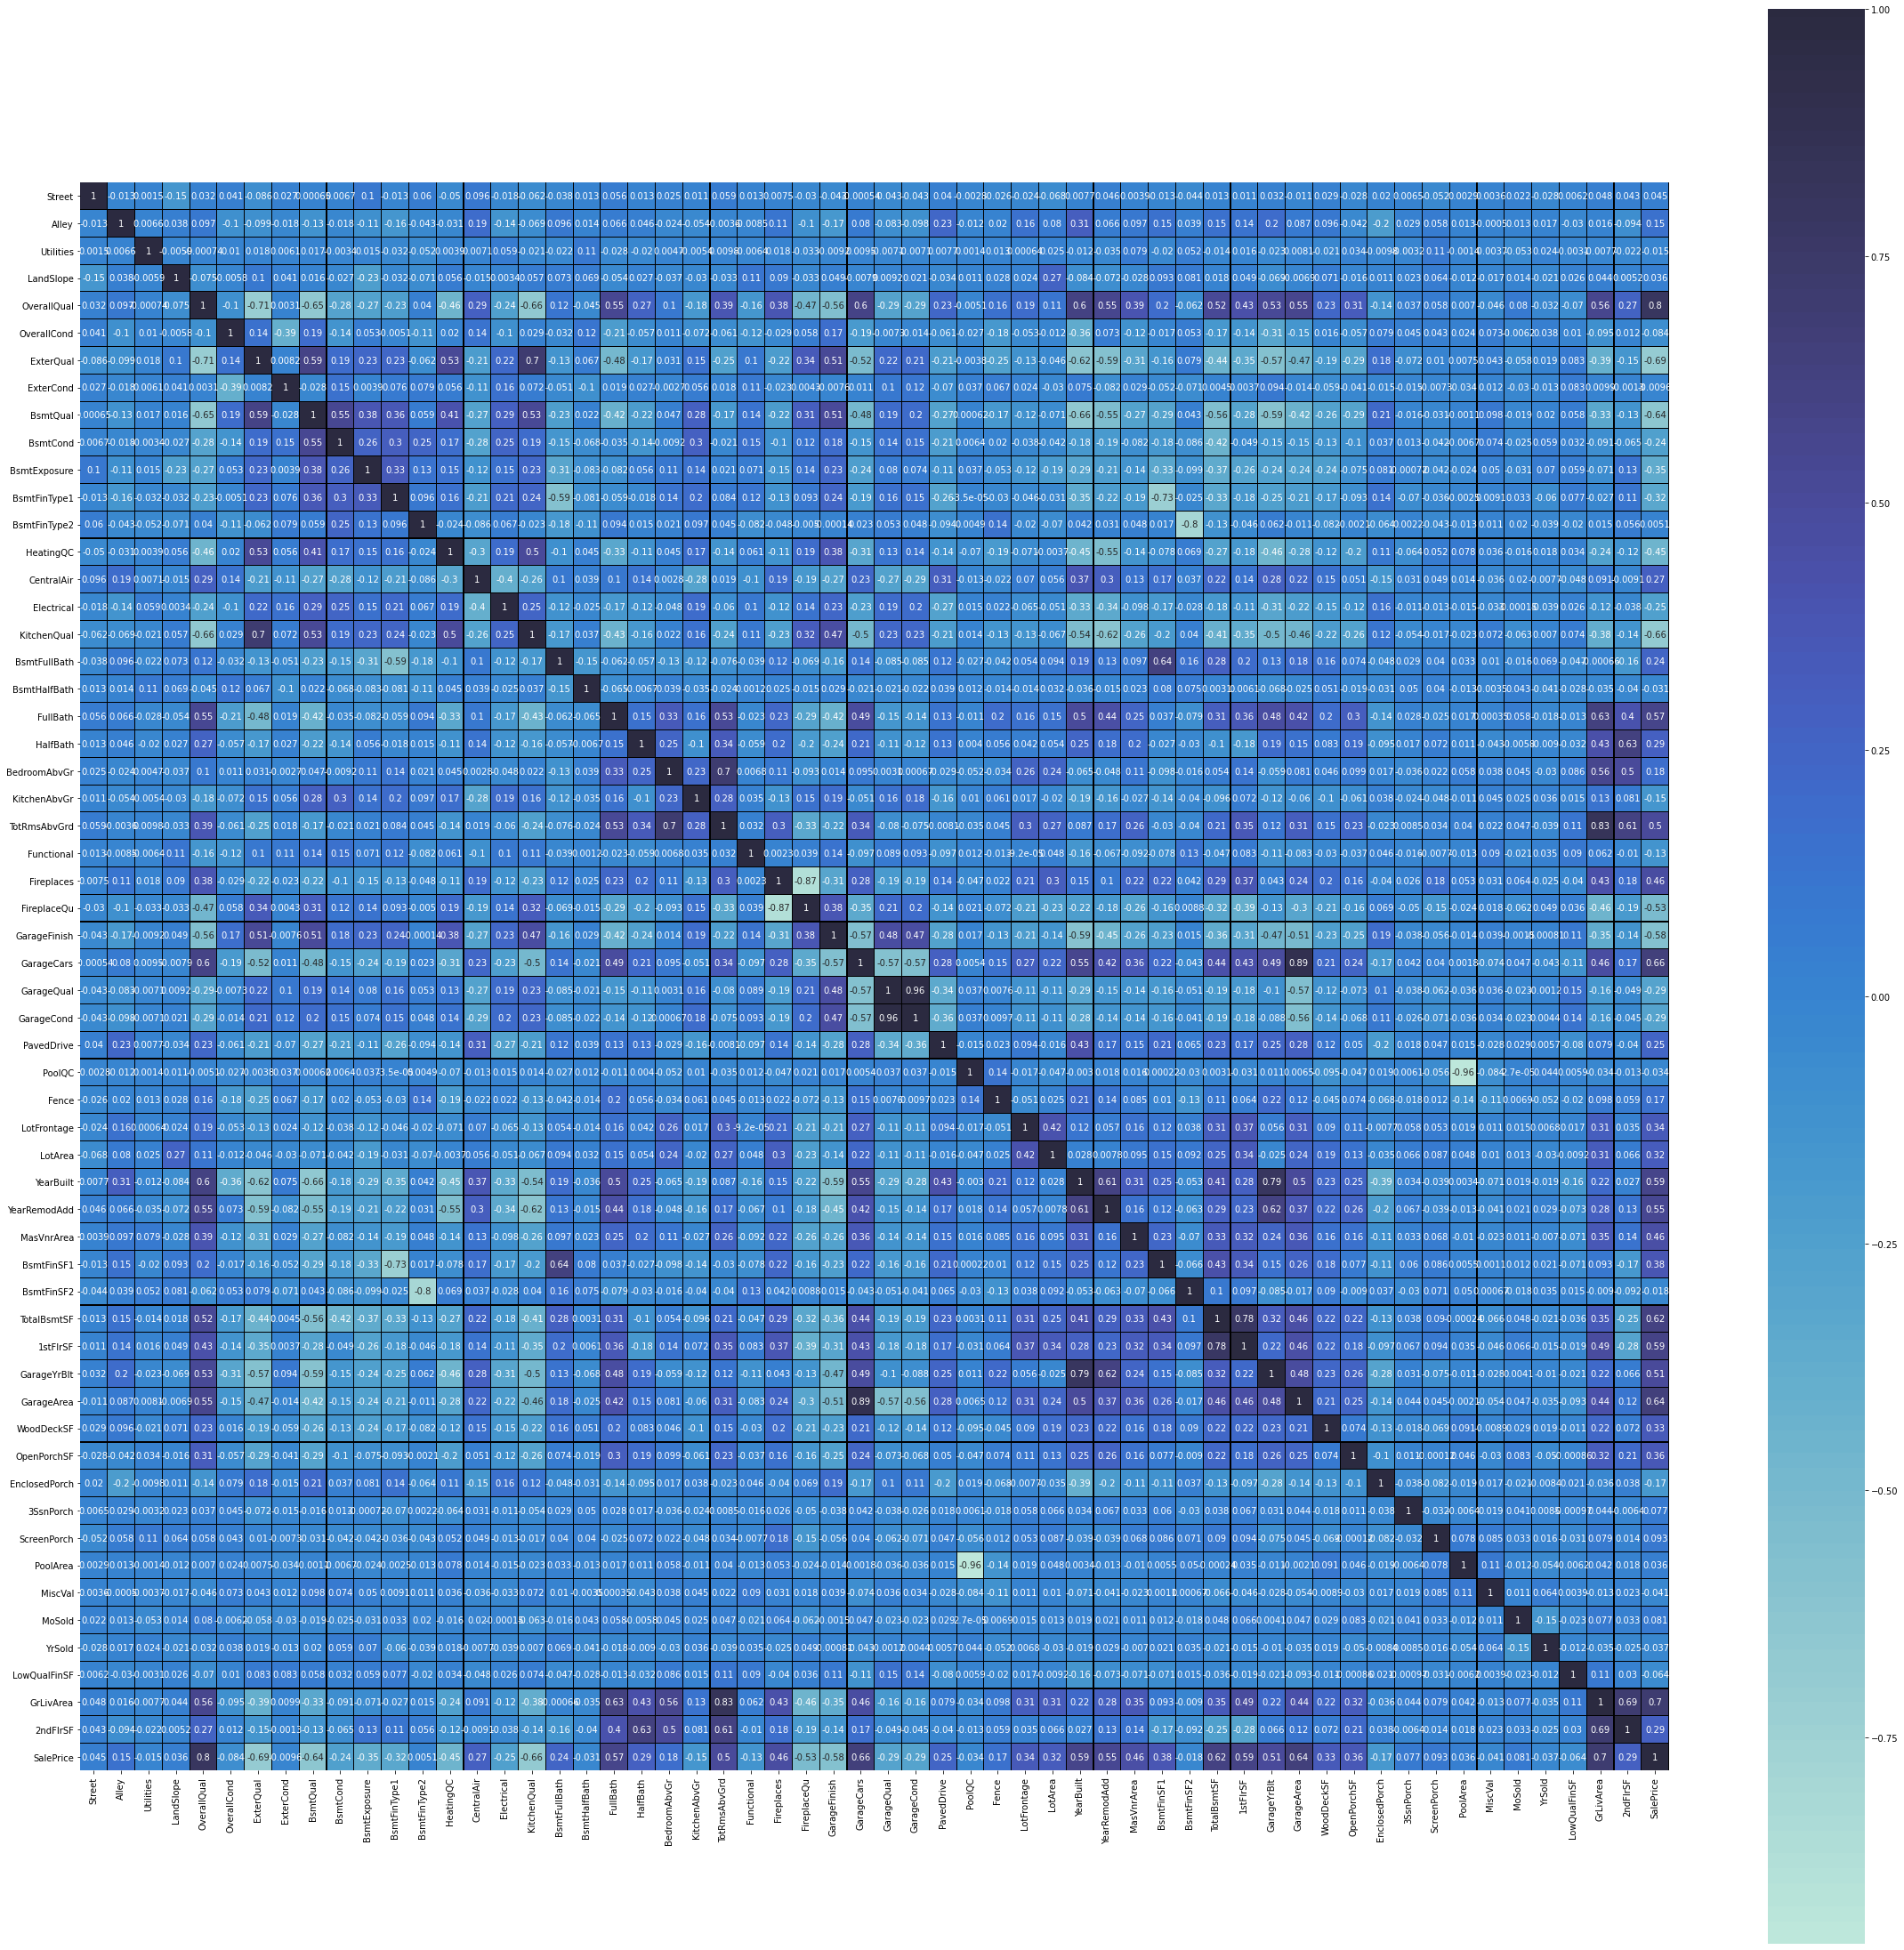

In [92]:
corr  = file[categorical_ordered+list_continuous + ['SalePrice']].corr()
f,axes = plt.subplots(1,1,figsize = (40,40))
sns.heatmap(corr,square=True,annot = True,linewidth = .1,linecolor = 'black',ax = axes,center = 1.4)

In [93]:
columns = categorical_ordered+list_continuous + ['SalePrice']
useful = []
for i in columns:
    if (corr[i]['SalePrice'])>=.15 or (corr[i]['SalePrice'])<=-.15:
        useful.append(i)
useful
        

['Alley',
 'OverallQual',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'GrLivArea',
 '2ndFlrSF',
 'SalePrice']

In [94]:
columns = categorical_ordered+list_continuous + ['SalePrice']
fig = px.imshow(corr,x = columns,y = columns)
fig.show()

TypeError: imshow() got an unexpected keyword argument 'x'

In [95]:
file.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [96]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

In [97]:
file[useful]

,Alley,OverallQual,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,...,TotalBsmtSF,1stFlrSF,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,GrLivArea,2ndFlrSF,SalePrice
0,3,7,2,2,2,4,1,1,2,1,...,856,856,2003.0,548,0,61,0,1710,854,208500
1,3,6,3,2,2,1,2,1,2,1,...,1262,1262,1976.0,460,298,0,0,1262,0,181500
2,3,7,2,2,2,3,1,1,2,1,...,920,920,2001.0,608,0,42,0,1786,866,223500
3,3,7,3,3,1,4,2,2,2,1,...,756,961,1998.0,642,0,35,272,1717,756,140000
4,3,8,2,2,2,2,1,1,2,1,...,1145,1145,2000.0,836,192,84,0,2198,1053,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,7,2,2,2,4,1,1,2,1,...,1221,1221,2004.0,400,0,113,0,1221,0,185000
1455,3,6,3,2,2,4,6,1,2,1,...,953,953,1999.0,460,0,40,0,1647,694,175000
1456,3,6,3,2,2,4,2,3,2,1,...,1542,2073,1978.0,500,349,0,0,2073,0,210000
1457,3,7,1,3,1,4,1,1,2,1,...,1152,1188,1941.0,252,0,60,0,2340,1152,266500


In [98]:
print(file.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [99]:
useful_category = []
for j in list_pure_categorical:
    for i in file.groupby(j).count().index:
        s = j+str(i)
        a=[]
        for k in file.index:
            if file[j][k]==i:
                a.append(1)
            else:
                a.append(0)
        file[s]=a
        useful_category.append(s)
len (useful_category)

170

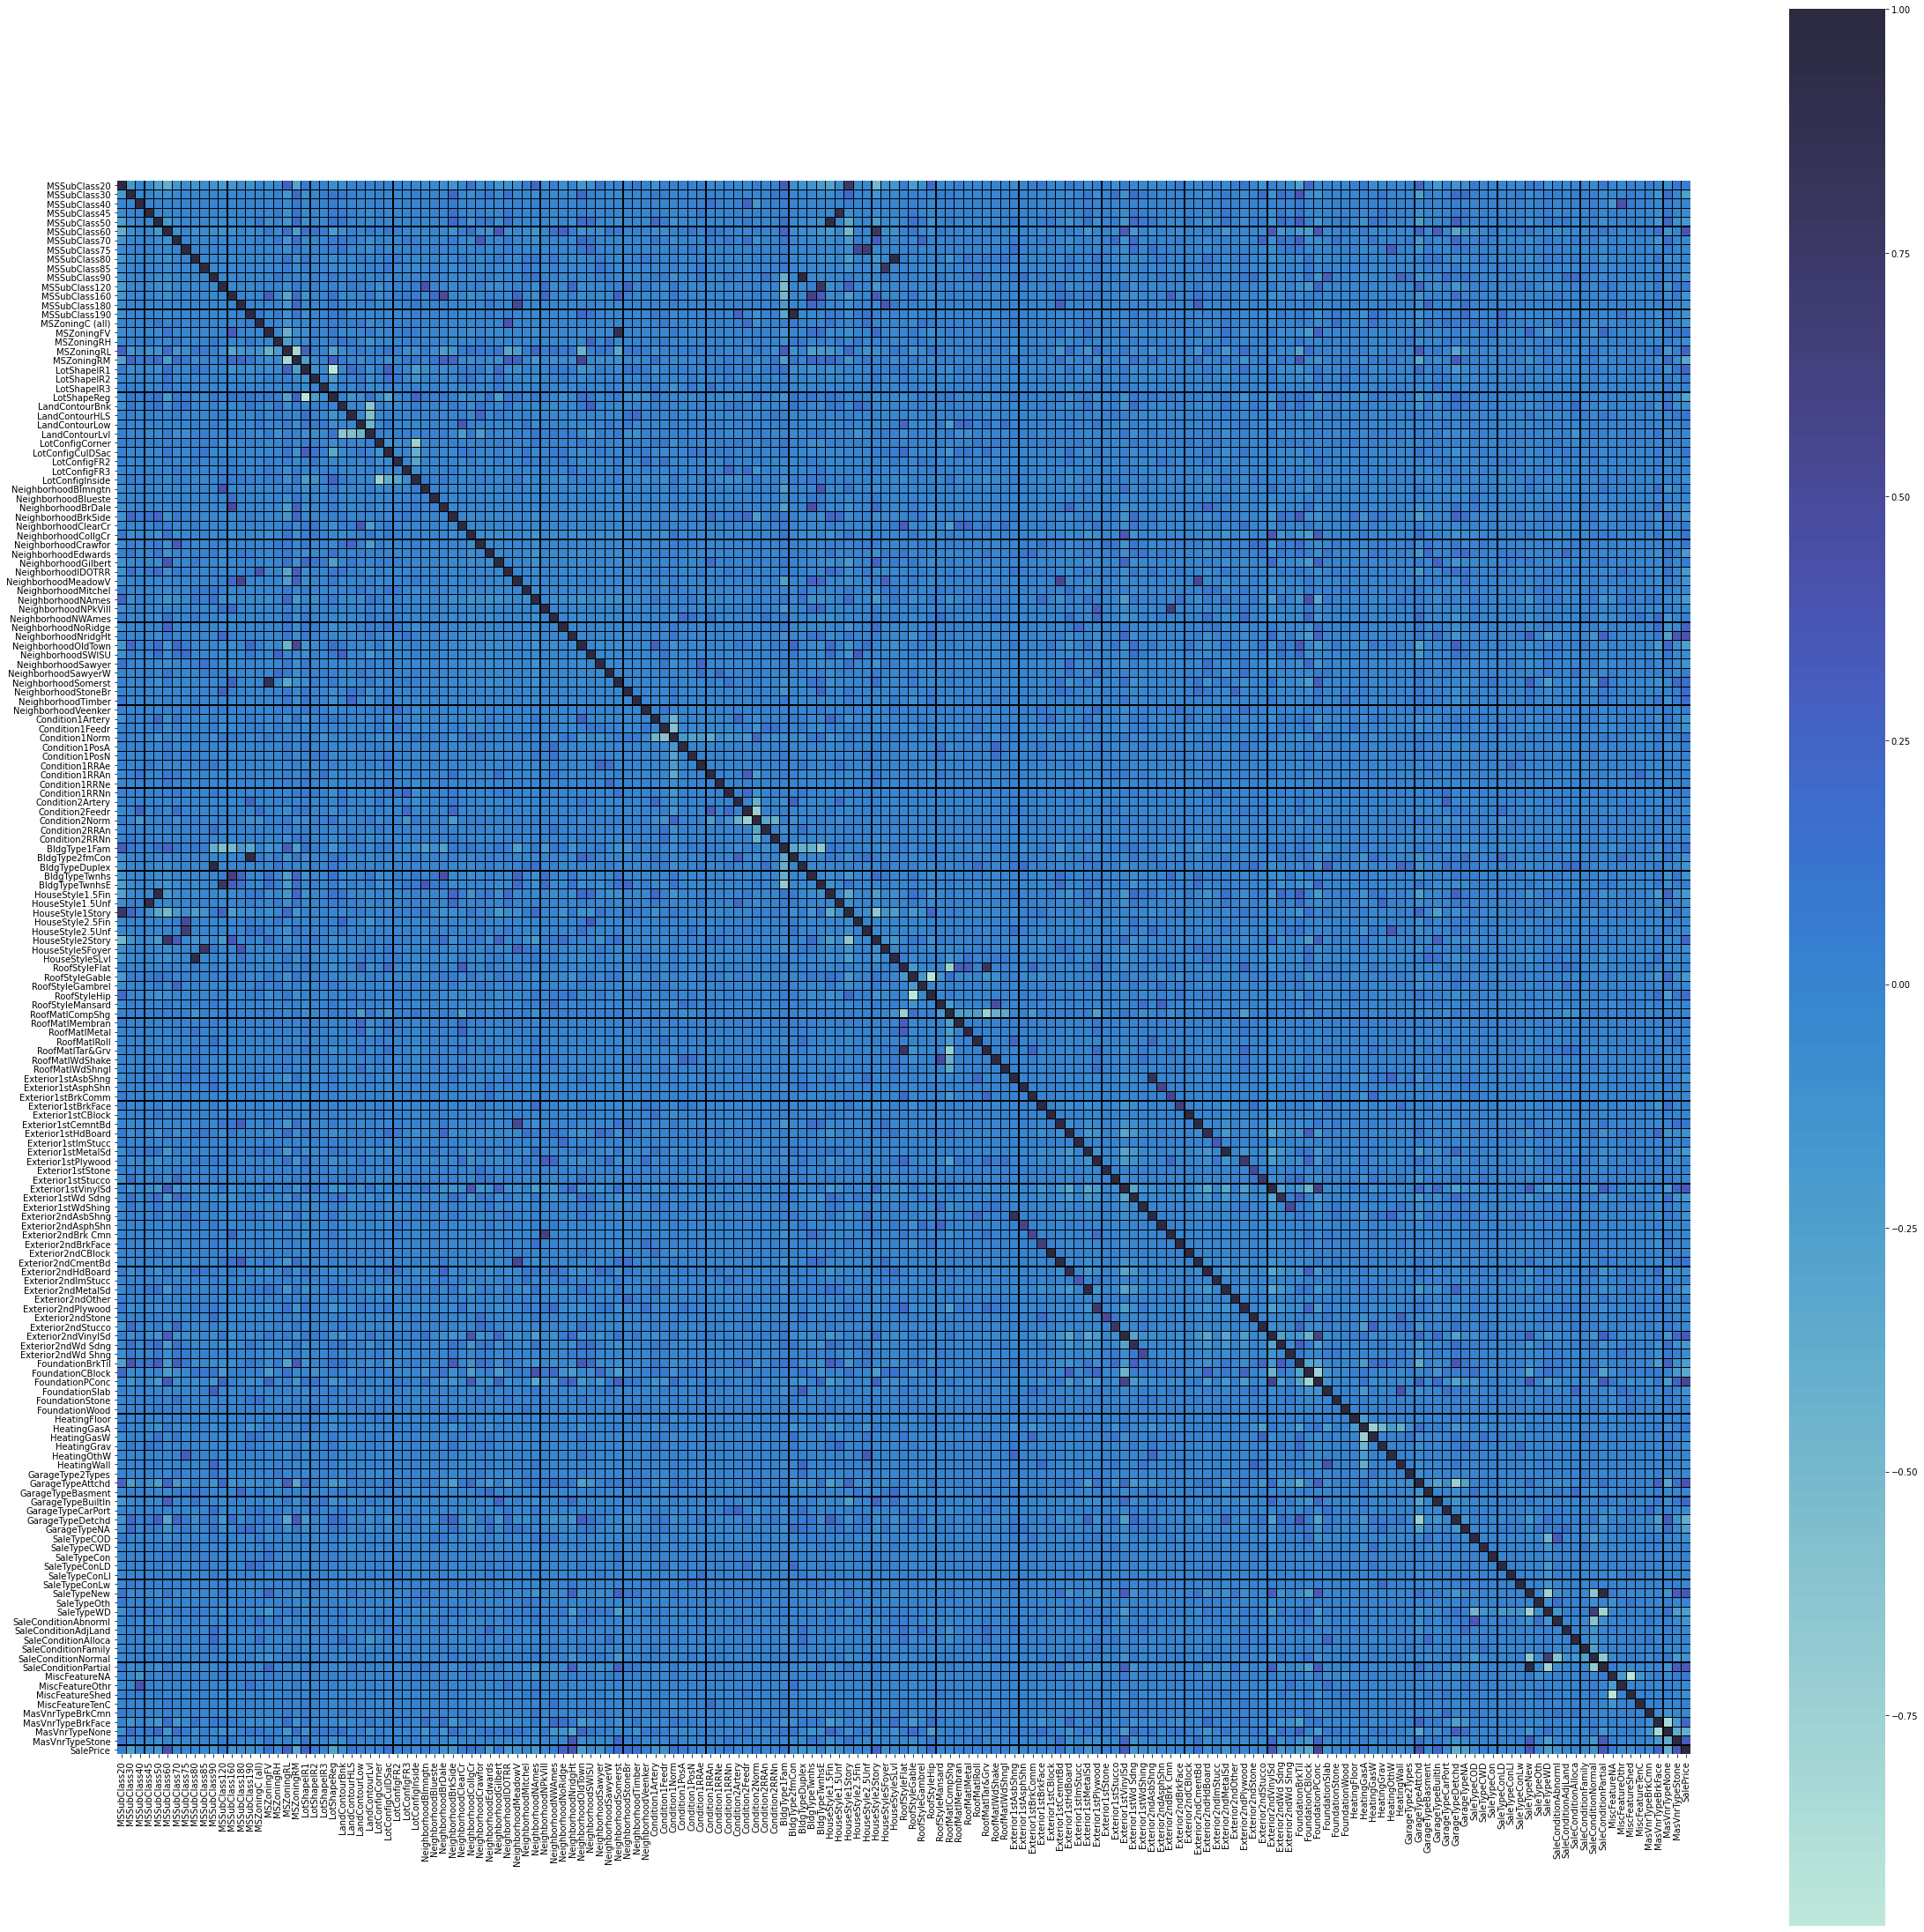

In [100]:
corr  = file[useful_category + ['SalePrice']].corr()
f,axes = plt.subplots(1,1,figsize = (40,40))
sns.heatmap(corr,square=True,linewidth = .1,linecolor = 'black',ax = axes,center = 1.4)

In [101]:
columns = useful_category + ['SalePrice']
final_useful = []
for i in columns:
    if (corr[i]['SalePrice'])>=.15 or (corr[i]['SalePrice'])<=-.15:
        final_useful.append(i)
final_useful

['MSSubClass30',
 'MSSubClass50',
 'MSSubClass60',
 'MSZoningRL',
 'MSZoningRM',
 'LotShapeIR1',
 'LotShapeReg',
 'NeighborhoodBrkSide',
 'NeighborhoodEdwards',
 'NeighborhoodIDOTRR',
 'NeighborhoodNAmes',
 'NeighborhoodNoRidge',
 'NeighborhoodNridgHt',
 'NeighborhoodOldTown',
 'NeighborhoodSomerst',
 'NeighborhoodStoneBr',
 'HouseStyle1.5Fin',
 'HouseStyle2Story',
 'RoofStyleGable',
 'RoofStyleHip',
 'Exterior1stMetalSd',
 'Exterior1stVinylSd',
 'Exterior1stWd Sdng',
 'Exterior2ndMetalSd',
 'Exterior2ndVinylSd',
 'Exterior2ndWd Sdng',
 'FoundationBrkTil',
 'FoundationCBlock',
 'FoundationPConc',
 'GarageTypeAttchd',
 'GarageTypeBuiltIn',
 'GarageTypeDetchd',
 'GarageTypeNA',
 'SaleTypeNew',
 'SaleTypeWD',
 'SaleConditionPartial',
 'MasVnrTypeBrkFace',
 'MasVnrTypeNone',
 'MasVnrTypeStone',
 'SalePrice']

In [102]:
useful = useful+final_useful
useful

['Alley',
 'OverallQual',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'GrLivArea',
 '2ndFlrSF',
 'SalePrice',
 'MSSubClass30',
 'MSSubClass50',
 'MSSubClass60',
 'MSZoningRL',
 'MSZoningRM',
 'LotShapeIR1',
 'LotShapeReg',
 'NeighborhoodBrkSide',
 'NeighborhoodEdwards',
 'NeighborhoodIDOTRR',
 'NeighborhoodNAmes',
 'NeighborhoodNoRidge',
 'NeighborhoodNridgHt',
 'NeighborhoodOldTown',
 'NeighborhoodSomerst',
 'NeighborhoodStoneBr',
 'HouseStyle1.5Fin',
 'HouseStyle2Story',
 'RoofStyleGable',
 'RoofStyleHip',
 '

In [103]:
df_train_x = file[useful].drop(['SalePrice'],axis = 1)
df_train_y = file[['SalePrice']]
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.15, random_state=42)

In [104]:
poly = PolynomialFeatures(degree=2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)

In [105]:
predict = []
reg = LinearRegression().fit(x_train, y_train)
pre_reg = reg.predict(x_test)

reg_poly = LinearRegression().fit(poly_x_train, y_train)
pre_reg_poly = reg_poly.predict(poly_x_test)

predict.append(pre_reg)
predict.append(pre_reg_poly)


for prediction in predict:
    pre = []
    for p in prediction:
        if p < 0:
            pre.append(0)
        else:
            pre.append(p)
    print(np.sqrt(mean_squared_log_error( y_test, pre )))

0.15617015091363745
3.7063159000446078


In [106]:
reg = LinearRegression().fit(df_train_x, df_train_y)


In [107]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [108]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [115]:
for i in test.columns:
    print( i+" \t: " +str(test[i].isnull().sum()))

Id 	: 0
MSSubClass 	: 0
MSZoning 	: 4
LotFrontage 	: 227
LotArea 	: 0
Street 	: 0
Alley 	: 1352
LotShape 	: 0
LandContour 	: 0
Utilities 	: 2
LotConfig 	: 0
LandSlope 	: 0
Neighborhood 	: 0
Condition1 	: 0
Condition2 	: 0
BldgType 	: 0
HouseStyle 	: 0
OverallQual 	: 0
OverallCond 	: 0
YearBuilt 	: 0
YearRemodAdd 	: 0
RoofStyle 	: 0
RoofMatl 	: 0
Exterior1st 	: 1
Exterior2nd 	: 1
MasVnrType 	: 16
MasVnrArea 	: 15
ExterQual 	: 0
ExterCond 	: 0
Foundation 	: 0
BsmtQual 	: 44
BsmtCond 	: 45
BsmtExposure 	: 44
BsmtFinType1 	: 42
BsmtFinSF1 	: 1
BsmtFinType2 	: 42
BsmtFinSF2 	: 1
BsmtUnfSF 	: 1
TotalBsmtSF 	: 1
Heating 	: 0
HeatingQC 	: 0
CentralAir 	: 0
Electrical 	: 0
1stFlrSF 	: 0
2ndFlrSF 	: 0
LowQualFinSF 	: 0
GrLivArea 	: 0
BsmtFullBath 	: 2
BsmtHalfBath 	: 2
FullBath 	: 0
HalfBath 	: 0
BedroomAbvGr 	: 0
KitchenAbvGr 	: 0
KitchenQual 	: 1
TotRmsAbvGrd 	: 0
Functional 	: 2
Fireplaces 	: 0
FireplaceQu 	: 730
GarageType 	: 76
GarageYrBlt 	: 78
GarageFinish 	: 78
GarageCars 	: 1
GarageArea

In [117]:
for i in null_replacements:
    test[i] = test[i].fillna(null_replacements[i])

In [118]:
for i in test.columns:
    print( i+" \t: " +str(test[i].isnull().sum()))

Id 	: 0
MSSubClass 	: 0
MSZoning 	: 4
LotFrontage 	: 0
LotArea 	: 0
Street 	: 0
Alley 	: 0
LotShape 	: 0
LandContour 	: 0
Utilities 	: 2
LotConfig 	: 0
LandSlope 	: 0
Neighborhood 	: 0
Condition1 	: 0
Condition2 	: 0
BldgType 	: 0
HouseStyle 	: 0
OverallQual 	: 0
OverallCond 	: 0
YearBuilt 	: 0
YearRemodAdd 	: 0
RoofStyle 	: 0
RoofMatl 	: 0
Exterior1st 	: 1
Exterior2nd 	: 1
MasVnrType 	: 0
MasVnrArea 	: 0
ExterQual 	: 0
ExterCond 	: 0
Foundation 	: 0
BsmtQual 	: 0
BsmtCond 	: 0
BsmtExposure 	: 0
BsmtFinType1 	: 0
BsmtFinSF1 	: 1
BsmtFinType2 	: 0
BsmtFinSF2 	: 1
BsmtUnfSF 	: 1
TotalBsmtSF 	: 1
Heating 	: 0
HeatingQC 	: 0
CentralAir 	: 0
Electrical 	: 0
1stFlrSF 	: 0
2ndFlrSF 	: 0
LowQualFinSF 	: 0
GrLivArea 	: 0
BsmtFullBath 	: 2
BsmtHalfBath 	: 2
FullBath 	: 0
HalfBath 	: 0
BedroomAbvGr 	: 0
KitchenAbvGr 	: 0
KitchenQual 	: 1
TotRmsAbvGrd 	: 0
Functional 	: 2
Fireplaces 	: 0
FireplaceQu 	: 0
GarageType 	: 0
GarageYrBlt 	: 0
GarageFinish 	: 0
GarageCars 	: 1
GarageArea 	: 1
GarageQual 

In [116]:
for i in categorical_ordered:
    print(i+" : "+str(test[i].value_counts().sum()))

Street : 1459
Alley : 107
Utilities : 1457
LandSlope : 1459
OverallQual : 1459
OverallCond : 1459
ExterQual : 1459
ExterCond : 1459
BsmtQual : 1415
BsmtCond : 1414
BsmtExposure : 1415
BsmtFinType1 : 1417
BsmtFinType2 : 1417
HeatingQC : 1459
CentralAir : 1459
Electrical : 1459
KitchenQual : 1458
BsmtFullBath : 1457
BsmtHalfBath : 1457
FullBath : 1459
HalfBath : 1459
BedroomAbvGr : 1459
KitchenAbvGr : 1459
TotRmsAbvGrd : 1459
Functional : 1457
Fireplaces : 1459
FireplaceQu : 729
GarageFinish : 1381
GarageCars : 1458
GarageQual : 1381
GarageCond : 1381
PavedDrive : 1459
PoolQC : 3
Fence : 290


In [ ]:
useful_category = []
for j in list_pure_categorical:
    for i in file.groupby(j).count().index:
        s = j+str(i)
        a=[]
        for k in test.index:
            if test[j][k]==i:
                a.append(1)
            else:
                a.append(0)
        test[s]=a
        useful_category.append(s)
len (useful_category)

In [ ]:
test

In [ ]:
for i in categorical_ordered:
    print(test[i].value_counts())

In [ ]:
for i in categorical_ordered:
    a = []
    for j in test.index:
        for k in range(len(dic1[i])):
            if test[i][j] == dic1[i][k]:
                a.append(k+1)
    test[i] = a

In [ ]:
test[useful]

In [ ]:
output  = reg.predict(test[useful])
output